In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ValueIterationAnswerKey import ValueIteration 

# Visualization Functions

In [2]:
def visualizeValueTable(gridWidth, gridHeight, goalState, trapState, valueTable):
    #grid height/width
    xs = np.linspace(-.5, gridWidth-.5, gridWidth+1)
    ys = np.linspace(-.50, gridHeight-.5, gridHeight+1)

    plt.rcParams["figure.figsize"] = [gridWidth*1.5,gridHeight*1.5]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))
    
    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-.5, goalState[1]-.5), 1, 1, fill=True, color='green', alpha=.1))
    ax.add_patch(Rectangle((trapState[0]-.5, trapState[1]-.5), 1, 1, fill=True, color='red', alpha=.1))
    
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex-.2, statey, str(round(val, 3)))    

    plt.show()

In [3]:
def visualizePolicy(gridWidth, gridHeight, goalState, trapState, policy):
    #grid height/width
    xs = np.linspace(-.5, gridWidth-.5, gridWidth+1)
    ys = np.linspace(-.50, gridHeight-.5, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*1.5,gridHeight*1.5]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-.5, goalState[1]-.5), 1, 1, fill=True, color='green', alpha=.1))
    ax.add_patch(Rectangle((trapState[0]-.5, trapState[1]-.5), 1, 1, fill=True, color='red', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY) in actionDict.keys():
            plt.arrow(statex, statey, optimalActionX*.2, optimalActionY*.2, head_width=0.05, head_length=0.1)    

    plt.show()

# Input and Value Iteration Implementation

In [4]:
"""
Example 1: Deterministic Transition
When transitions are deterministic, the optimal policy is always to take the action or actions that move you closer to the goal state while avoiding the trap.
"""
    
transitionTableDet = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1}},(2, 0): {(1, 0): {(2, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1}},(2, 1): {(1, 0): {(2, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1}},(2, 2): {(1, 0): {(2, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1}},(2, 3): {(1, 0): {(2, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1}},(2, 4): {(1, 0): {(2, 4): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1}}}
rewardTableDet = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): 10},(0, 1): {(1, 2): 10},(-1, 0): {(0, 1): 10},(0, -1): {(1, 0): 10}},(1, 2): {(1, 0): {(2, 2): -100},(0, 1): {(1, 3): -100},(-1, 0): {(0, 2): -100},(0, -1): {(1, 1): -100}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1}},(2, 0): {(1, 0): {(2, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(2, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1}},(2, 2): {(1, 0): {(2, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1}},(2, 3): {(1, 0): {(2, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1}},(2, 4): {(1, 0): {(2, 4): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1}}}
valueTableDet = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(0, 4): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(1, 4): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(2, 4): 0}
convergenceTolerance = 10e-7
gamma = .9


"""
Example 2: Probabilistic Transition

"""
transitionTable = {(0, 0): {(1, 0): {(1, 0): 0.7, (0, 1): 0.2, (0, 0): 0.1},(0, 1): {(0, 1): 0.7999999999999999, (1, 0): 0.2},(-1, 0): {(0, 0): 0.7, (1, 0): 0.2, (0, 1): 0.1},(0, -1): {(0, 0): 0.7, (1, 0): 0.1, (0, 1): 0.2}},(0, 1): {(1, 0): {(1, 1): 0.7999999999999999, (0, 1): 0.1, (0, 2): 0.1},(0, 1): {(0, 2): 0.7999999999999999, (0, 0): 0.2},(-1, 0): {(0, 1): 0.8999999999999999, (0, 0): 0.1},(0, -1): {(0, 0): 0.7999999999999999, (0, 2): 0.1, (0, 1): 0.1}},(0, 2): {(1, 0): {(1, 2): 0.7999999999999999, (0, 1): 0.2},(0, 1): {(0, 3): 0.7999999999999999, (0, 1): 0.1, (1, 2): 0.1},(-1, 0): {(0, 2): 0.7, (0, 1): 0.1, (1, 2): 0.1, (0, 3): 0.1},(0, -1): {(0, 1): 0.8999999999999999, (0, 3): 0.1}},(0, 3): {(1, 0): {(1, 3): 0.8999999999999999, (0, 2): 0.1},(0, 1): {(0, 3): 0.9999999999999999},(-1, 0): {(0, 3): 0.7999999999999999, (0, 2): 0.1, (1, 3): 0.1},(0, -1): {(0, 2): 0.7999999999999999, (0, 3): 0.2}},(1, 0): {(1, 0): {(2, 0): 0.8999999999999999, (1, 1): 0.1},(0, 1): {(1, 1): 0.8999999999999999, (1, 0): 0.1},(-1, 0): {(0, 0): 0.7, (1, 1): 0.2, (2, 0): 0.1},(0, -1): {(1, 0): 0.7999999999999999, (0, 0): 0.2}},(1, 1): {(1, 0): {(2, 1): 0.7999999999999999, (1, 0): 0.1, (0, 1): 0.1},(0, 1): {(1, 2): 0.7, (2, 1): 0.30000000000000004},(-1, 0): {(0, 1): 0.7, (2, 1): 0.1, (1, 0): 0.2},(0, -1): {(1, 0): 0.7999999999999999, (0, 1): 0.1, (2, 1): 0.1}},(1, 2): {(1, 0): {(2, 2): 0.7999999999999999, (1, 3): 0.1, (1, 1): 0.1},(0, 1): {(1, 3): 0.8999999999999999, (2, 2): 0.1},(-1, 0): {(0, 2): 0.8999999999999999, (1, 1): 0.1},(0, -1): {(1, 1): 0.7999999999999999, (2, 2): 0.1, (0, 2): 0.1}},(1, 3): {(1, 0): {(2, 3): 0.7999999999999999, (1, 3): 0.2},(0, 1): {(1, 3): 0.7999999999999999, (2, 3): 0.1, (0, 3): 0.1},(-1, 0): {(0, 3): 0.7, (2, 3): 0.1, (1, 2): 0.2},(0, -1): {(1, 2): 0.7999999999999999, (0, 3): 0.2}},(2, 0): {(1, 0): {(3, 0): 0.8999999999999999, (2, 0): 0.1},(0, 1): {(2, 1): 0.7999999999999999, (3, 0): 0.1, (1, 0): 0.1},(-1, 0): {(1, 0): 0.7, (2, 0): 0.2, (2, 1): 0.1},(0, -1): {(2, 0): 0.7, (2, 1): 0.2, (1, 0): 0.1}},(2, 1): {(1, 0): {(3, 1): 0.7999999999999999, (1, 1): 0.2},(0, 1): {(2, 2): 0.7, (1, 1): 0.1, (3, 1): 0.2},(-1, 0): {(1, 1): 0.7, (2, 0): 0.1, (2, 2): 0.1, (3, 1): 0.1},(0, -1): {(2, 0): 0.7, (1, 1): 0.2, (3, 1): 0.1}},(2, 2): {(1, 0): {(3, 2): 0.7, (1, 2): 0.1, (2, 1): 0.2},(0, 1): {(2, 3): 0.7999999999999999, (2, 1): 0.2},(-1, 0): {(1, 2): 0.7999999999999999, (2, 1): 0.1, (3, 2): 0.1},(0, -1): {(2, 1): 0.7999999999999999, (1, 2): 0.1, (3, 2): 0.1}},(2, 3): {(1, 0): {(3, 3): 0.7, (2, 3): 0.2, (2, 2): 0.1},(0, 1): {(2, 3): 0.7999999999999999, (2, 2): 0.1, (3, 3): 0.1},(-1, 0): {(1, 3): 0.8999999999999999, (2, 3): 0.1},(0, -1): {(2, 2): 0.7, (3, 3): 0.1, (1, 3): 0.1, (2, 3): 0.1}},(3, 0): {(1, 0): {(3, 0): 0.7, (3, 1): 0.1, (2, 0): 0.2},(0, 1): {(3, 1): 0.7999999999999999, (2, 0): 0.2},(-1, 0): {(2, 0): 0.7999999999999999, (3, 0): 0.2},(0, -1): {(3, 0): 0.7999999999999999, (2, 0): 0.1, (3, 1): 0.1}},(3, 1): {(1, 0): {(3, 1): 0.8999999999999999, (3, 2): 0.1},(0, 1): {(3, 2): 0.7, (2, 1): 0.2, (3, 0): 0.1},(-1, 0): {(2, 1): 0.7999999999999999, (3, 0): 0.1, (3, 1): 0.1},(0, -1): {(3, 0): 0.7999999999999999, (2, 1): 0.2}},(3, 2): {(1, 0): {(3, 2): 0.7999999999999999, (3, 1): 0.1, (2, 2): 0.1},(0, 1): {(3, 3): 0.7, (3, 2): 0.2, (2, 2): 0.1},(-1, 0): {(2, 2): 0.9999999999999999},(0, -1): {(3, 1): 0.7999999999999999, (3, 3): 0.1, (3, 2): 0.1}},(3, 3): {(1, 0): {(3, 3): 0.7999999999999999, (3, 2): 0.2},(0, 1): {(3, 3): 0.7999999999999999, (3, 2): 0.2},(-1, 0): {(2, 3): 0.7999999999999999, (3, 2): 0.1, (3, 3): 0.1},(0, -1): {(3, 2): 0.7999999999999999, (2, 3): 0.2}}}
rewardTable = {(0, 0): {(1, 0): {(1, 0): -1, (0, 1): -1, (0, 0): -1},(0, 1): {(0, 1): -1, (1, 0): -1},(-1, 0): {(0, 0): -1, (1, 0): -1, (0, 1): -1},(0, -1): {(0, 0): -1, (1, 0): -1, (0, 1): -1}},(0, 1): {(1, 0): {(1, 1): -1, (0, 1): -1, (0, 2): -1},(0, 1): {(0, 2): -1, (0, 0): -1},(-1, 0): {(0, 1): -1, (0, 0): -1},(0, -1): {(0, 0): -1, (0, 2): -1, (0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1, (0, 1): -1},(0, 1): {(0, 3): -1, (0, 1): -1, (1, 2): -1},(-1, 0): {(0, 2): -1, (0, 1): -1, (1, 2): -1, (0, 3): -1},(0, -1): {(0, 1): -1, (0, 3): -1}},(0, 3): {(1, 0): {(1, 3): -1, (0, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 3): -1, (0, 2): -1, (1, 3): -1},(0, -1): {(0, 2): -1, (0, 3): -1}},(1, 0): {(1, 0): {(2, 0): -1, (1, 1): -1},(0, 1): {(1, 1): -1, (1, 0): -1},(-1, 0): {(0, 0): -1, (1, 1): -1, (2, 0): -1},(0, -1): {(1, 0): -1, (0, 0): -1}},(1, 1): {(1, 0): {(2, 1): -100, (1, 0): -100, (0, 1): -100},(0, 1): {(1, 2): -100, (2, 1): -100},(-1, 0): {(0, 1): -100, (2, 1): -100, (1, 0): -100},(0, -1): {(1, 0): -100, (0, 1): -100, (2, 1): -100}},(1, 2): {(1, 0): {(2, 2): -1, (1, 3): -1, (1, 1): -1},(0, 1): {(1, 3): -1, (2, 2): -1},(-1, 0): {(0, 2): -1, (1, 1): -1},(0, -1): {(1, 1): -1, (2, 2): -1, (0, 2): -1}},(1, 3): {(1, 0): {(2, 3): -1, (1, 3): -1},(0, 1): {(1, 3): -1, (2, 3): -1, (0, 3): -1},(-1, 0): {(0, 3): -1, (2, 3): -1, (1, 2): -1},(0, -1): {(1, 2): -1, (0, 3): -1}},(2, 0): {(1, 0): {(3, 0): -1, (2, 0): -1},(0, 1): {(2, 1): -1, (3, 0): -1, (1, 0): -1},(-1, 0): {(1, 0): -1, (2, 0): -1, (2, 1): -1},(0, -1): {(2, 0): -1, (2, 1): -1, (1, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1, (1, 1): -1},(0, 1): {(2, 2): -1, (1, 1): -1, (3, 1): -1},(-1, 0): {(1, 1): -1, (2, 0): -1, (2, 2): -1, (3, 1): -1},(0, -1): {(2, 0): -1, (1, 1): -1, (3, 1): -1}},(2, 2): {(1, 0): {(3, 2): -1, (1, 2): -1, (2, 1): -1},(0, 1): {(2, 3): -1, (2, 1): -1},(-1, 0): {(1, 2): -1, (2, 1): -1, (3, 2): -1},(0, -1): {(2, 1): -1, (1, 2): -1, (3, 2): -1}},(2, 3): {(1, 0): {(3, 3): -1, (2, 3): -1, (2, 2): -1},(0, 1): {(2, 3): -1, (2, 2): -1, (3, 3): -1},(-1, 0): {(1, 3): -1, (2, 3): -1},(0, -1): {(2, 2): -1, (3, 3): -1, (1, 3): -1, (2, 3): -1}},(3, 0): {(1, 0): {(3, 0): -1, (3, 1): -1, (2, 0): -1},(0, 1): {(3, 1): -1, (2, 0): -1},(-1, 0): {(2, 0): -1, (3, 0): -1},(0, -1): {(3, 0): -1, (2, 0): -1, (3, 1): -1}},(3, 1): {(1, 0): {(3, 1): -1, (3, 2): 10},(0, 1): {(3, 2): 10, (2, 1): 10, (3, 0): 10},(-1, 0): {(2, 1): 10, (3, 0): 10, (3, 1): -1},(0, -1): {(3, 0): 10, (2, 1): 10}},(3, 2): {(1, 0): {(3, 2): -1, (3, 1): -1, (2, 2): -1},(0, 1): {(3, 3): -1, (3, 2): -1, (2, 2): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1, (3, 3): -1, (3, 2): -1}},(3, 3): {(1, 0): {(3, 3): -1, (3, 2): -1},(0, 1): {(3, 3): -1, (3, 2): -1},(-1, 0): {(2, 3): -1, (3, 2): -1, (3, 3): -1},(0, -1): {(3, 2): -1, (2, 3): -1}}}
valueTable = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(3, 0): 0,(3, 1): 0,(3, 2): 0,(3, 3): 0}
convergenceTolerance = 10e-7
gamma = .9


## Example 1

In [5]:
performValueIteration = ValueIteration(transitionTableDet, rewardTableDet, valueTableDet, convergenceTolerance, gamma)
optimalValuesDet, policyTableDet = performValueIteration()

In [6]:
optimalValuesDet

{(0, 0): 36.89473264025735,
 (0, 1): 42.105259376231615,
 (0, 2): 36.894733438608455,
 (0, 3): 32.20526009474761,
 (0, 4): 27.984734085272848,
 (1, 0): 42.105259376231615,
 (1, 1): 47.894733438608455,
 (1, 2): -56.894739905252386,
 (1, 3): 27.984734085272848,
 (1, 4): 24.186260676745565,
 (2, 0): 36.894733438608455,
 (2, 1): 42.105260094747614,
 (2, 2): 36.89473408527285,
 (2, 3): 32.20526067674557,
 (2, 4): 27.984734609071012}

In [7]:
policyTableDet

{(0, 0): {(1, 0): 0.5, (0, 1): 0.5},
 (0, 1): {(1, 0): 1.0},
 (0, 2): {(0, -1): 1.0},
 (0, 3): {(0, -1): 1.0},
 (0, 4): {(0, -1): 1.0},
 (1, 0): {(0, 1): 1.0},
 (1, 1): {(1, 0): 0.3333333333333333,
  (-1, 0): 0.3333333333333333,
  (0, -1): 0.3333333333333333},
 (1, 2): {(0, -1): 1.0},
 (1, 3): {(1, 0): 0.5, (-1, 0): 0.5},
 (1, 4): {(1, 0): 0.3333333333333333,
  (-1, 0): 0.3333333333333333,
  (0, -1): 0.3333333333333333},
 (2, 0): {(0, 1): 0.5, (-1, 0): 0.5},
 (2, 1): {(-1, 0): 1.0},
 (2, 2): {(0, -1): 1.0},
 (2, 3): {(0, -1): 1.0},
 (2, 4): {(0, -1): 1.0}}

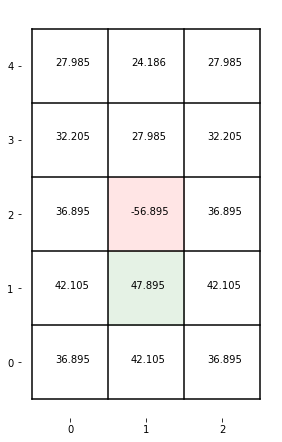

In [8]:
visualizeValueTable(gridWidth = 3, gridHeight = 5, goalState = (1,1), trapState = (1,2), valueTable = optimalValuesDet)

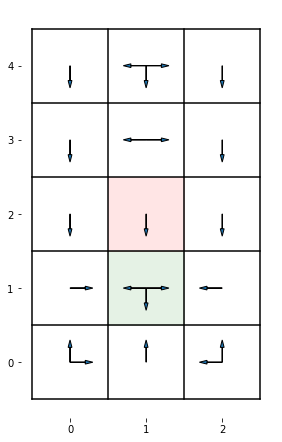

In [9]:
visualizePolicy(gridWidth=3, gridHeight=5, goalState=(1,1), trapState = (1,2), policy=policyTableDet)

## Example 2

In [10]:
performValueIteration = ValueIteration(transitionTable, rewardTable, valueTable, convergenceTolerance, gamma)
optimalValues, policyTable = performValueIteration()

In [11]:
optimalValues

{(0, 0): 2.659112837428484,
 (0, 1): 3.4926894314499815,
 (0, 2): 5.575068944672131,
 (0, 3): 7.550299452281154,
 (1, 0): 4.43033220935213,
 (1, 1): -93.81754530332222,
 (1, 2): 8.258868500751214,
 (1, 3): 9.936473744864651,
 (2, 0): 17.128286319859953,
 (2, 1): 3.627289357341934,
 (2, 2): 13.448058946783663,
 (2, 3): 12.705429113198313,
 (3, 0): 20.477458178403065,
 (3, 1): 25.54773201777233,
 (3, 2): 20.717220675750447,
 (3, 3): 16.203376126916016}

In [12]:
policyTable

{(0, 0): {(1, 0): 1.0},
 (0, 1): {(0, 1): 1.0},
 (0, 2): {(1, 0): 1.0},
 (0, 3): {(1, 0): 1.0},
 (1, 0): {(1, 0): 1.0},
 (1, 1): {(0, 1): 1.0},
 (1, 2): {(0, 1): 1.0},
 (1, 3): {(1, 0): 1.0},
 (2, 0): {(1, 0): 1.0},
 (2, 1): {(0, 1): 1.0},
 (2, 2): {(1, 0): 1.0},
 (2, 3): {(1, 0): 1.0},
 (3, 0): {(0, 1): 1.0},
 (3, 1): {(0, 1): 1.0},
 (3, 2): {(0, -1): 1.0},
 (3, 3): {(0, -1): 1.0}}

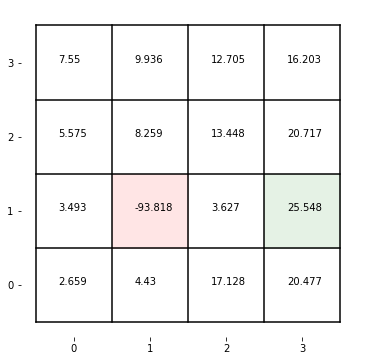

In [13]:
visualizeValueTable(gridWidth = 4, gridHeight = 4, goalState = (3,1), trapState = (1,1), valueTable = optimalValues)

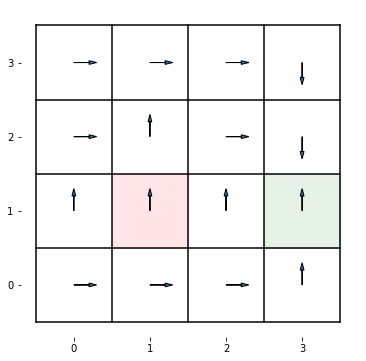

In [14]:
visualizePolicy(gridWidth=4, gridHeight=4, goalState=(3,1), trapState = (1,1), policy=policyTable)